In [1]:
import geopandas as gpd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import osmnx as ox

In [2]:
ox.config(use_cache=True, log_console=True)

c:\Users\barguzin\anaconda3\envs\geoviz\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [3]:
# East SB: 34.429765, -119.715842
# download street network data from OSM and construct a MultiDiGraph model
G = ox.graph_from_point((34.429765, -119.715842), dist=5000, network_type="drive")

In [4]:
# impute edge (driving) speeds and calculate edge traversal times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

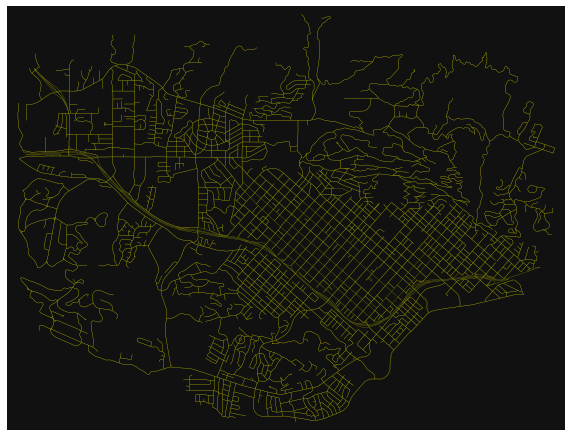

In [9]:
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

In [10]:
# you can convert MultiDiGraph to/from geopandas GeoDataFrames
#gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
#G = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

In [11]:
# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.utils_graph.get_digraph(G, weight="travel_time")

# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

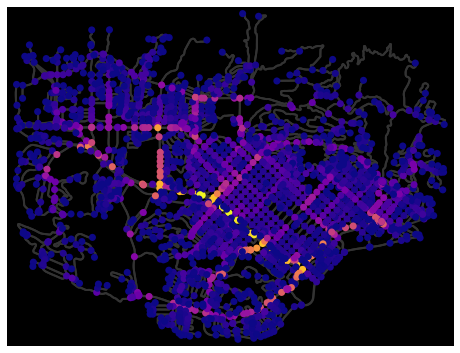

In [12]:
# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

In [13]:
# save graph to shapefile, geopackage, or graphml
#ox.save_graph_shapefile(G, filepath="./graph_shapefile/")
#ox.save_graph_geopackage(G, filepath="./graph.gpkg")
#ox.save_graphml(G, filepath="./graph.graphml")